###                                                               UNIVERSITY OF LONDON
####                                 CM2015 - PROGRAMMING WITH DATA,Mid-term programming assignment [001]

####                                                                                                                                                          Name – Rishi Sankhla
####                                                                                                                                                          Student No. – 200102874
#### If formating is not proper then please check out pdf version of it.

# UNEMPLOYMENT IN THE WORLD

### Corelation between unemployment in the world and education dropout rates in men and women

In [27]:
#importing all the necessary libraries
import requests as req
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import mean_squared_error
import nltk
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rishy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rishy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Here I downloaded dataset from https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020?select=unemployment_data_us.csv

In [2]:
#extracing our first data from CSV format
our_data1=pd.read_csv('unemployment_data_us.csv')

#### Here I downloaded dataset from https://www.kaggle.com/sovannt/world-bank-youth-unemployment/version/1

In [5]:
#extracing our second data from CSV format
our_data2=pd.read_csv('API_ILO_country_YU.csv') 
our_data2=our_data2.drop(['Country Code'],axis=1)
our_data2=our_data2.transpose()
our_data2.columns = our_data2.iloc[0]
our_data2=our_data2.drop(our_data2.index[0])

#### Here I downloaded dataset from https://www.kaggle.com/gokulrajkmv/unemployment-in-india?select=Unemployment+in+India.csv

In [6]:
#extracing our third data from CSV format
our_data3=pd.read_csv('Unemployment_in_India.csv')
our_data3=our_data3.dropna()

#### Open source data obtained from Kaggle in the form of CSV files.
#### It contains unemployment rate records based on education qualification, race, and gender of adults.

In [7]:
#It contains unemployment rate records based on education qualification, race, and gender of adults.
our_data1.head()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8


#### Open source data obtained from Kaggle in the form of CSV files
#### World Bank - Youth Unemployment rates (IPO) by country, 2010 - 2014.

In [8]:
#World Bank - Youth Unemployment rates (IPO) by country, 2010 - 2014
our_data2.head()

Country Name,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uzbekistan,"Venezuela, RB",Vietnam,West Bank and Gaza,World,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
2010,20.6,10.8,25.8,25.0222,9.8,19.5,38.3,11.4,8.8,14.6,...,20.6,17.5,6.1,37.7,13.785,30.3,50.8,12.3,26.4,9.6
2011,20.9,10.7,27,28.1175,9.8,18.8,38.7,11.4,8.2,14.5,...,20.6,17.4,5.3,34.1,13.7147,30,50.1,12.3,26.6,8.3
2012,19.7,10.7,28.3,29.1132,9.8,18.4,35,11.7,8.7,14.3,...,20.6,17.1,5,37.3,13.8743,30.2,52.2,12.3,26.6,8.3
2013,21.1,10.6,28.7,29.3353,9.9,19.7,32.5,12.2,9.1,13.4,...,20.5,14.8,6.3,38.7,13.9038,30.2,51.4,12.2,25.5,8.9
2014,20.8,10.5,29.2,29.7046,10,21.3,35.1,13.1,9.2,13.6,...,20.3,17.1,6.3,42.7,13.9872,29.9,52.6,11.9,25.1,9.4


#### These datasets show the effect of lock-down on employment opportunities and unemployment rate increases during the Covid-19.

In [9]:
#The story behind this datasets is how lock-down affects employment opportunities and 
#how the unemployment rate increases during the Covid-19.
our_data3.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


#### Web scrapping open source data obtained from "https://unemploymentinindia.cmie.com/"

In [10]:
#using beautiful soup library to web scrap data
original_url = "https://unemploymentinindia.cmie.com/"
r = req.get(original_url)
soup = BeautifulSoup(r.text, "html.parser")

#printing first few lines of HTML code
print(str(soup)[0:1000])

<!--!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml"-->
<head lang="EN">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Unemployment</title>
<link href="/lib/unemployment.css" rel="stylesheet" type="text/css"/>
<script language="JavaScript" src="/lib/frmajax.js"></script>
<script language="JavaScript" src="/lib/ac_oetags.js"></script>
<script language="JavaScript" src="/lib/misc.js"></script>
<link href="/kommon/bin/sr.php?kall=dlstream&amp;streamfile=spin.css" rel="stylesheet" type="text/css"/>
<script language="JavaScript" src="/kommon/bin/sr.php?kall=dlstream&amp;streamfile=spin.min.js"></script>
<link href="/kommon/bin/sr.php?kall=dlstream&amp;streamfile=handsontable.full.css" rel="stylesheet" type="text/css"/>
<script language="JavaScript" src="/kommon/bin/sr.php?kall=dlstream&amp;streamfile=handsontable.full.js"></script>
<script language

In [11]:
#extracting data from appropriate tags 
for i in soup.find_all("table",{"id":"ftable","style":"float:right;"}):
    our_data_str=str(i)
    
#storing data in list
our_data_str=our_data_str.split()

#cleaning list
del our_data_str[0:23]
k=['<th','</tr>','<tr>','<td','</table>']
our_data_str = [i for i in our_data_str if i not in k]
our_data_str[0:10]

['width="22%">India</th>',
 'width="22%">Urban</th>',
 'width="22%">Rural</th>',
 '<td>23',
 'Jan',
 '2022</td>',
 'align="right">6.90</td>',
 'align="right">8.36</td>',
 'align="right">6.21</td>',
 '<td>22']

In [12]:
#extracting column names
our_data_str_column_name=['date','month','year']
for i in  our_data_str[0:3]:
    our_data_str_column_name.append(i.replace('width="22%">', '').replace('</th>', ''))
    
#print our columns names
our_data_str_column_name

['date', 'month', 'year', 'India', 'Urban', 'Rural']

In [13]:
#further cleaning our main list
del our_data_str[0:3]
our_data_str_final=['','','']
for i in our_data_str:
    our_data_str_final.append(i.replace('<td>', '').replace('</td>', '').replace('align="right">', ''))

In [14]:
#extracting column data from our main list
c=0
column2_data=[]
column3_data=[]
column4_data=[]
for i in our_data_str_final:
    if c%6==0:
        column2_data.append(i)
    if c%6==1:
        column3_data.append(i)
    if c%6==2:
        column4_data.append(i)
    c=c+1
    
#cleaning first row from each column
del column4_data[0:1]
del column3_data[0:1]
del column2_data[0:1]

In [15]:
#further cleaning our main list
k=column2_data+column3_data+column4_data
our_data_str_final = [i for i in our_data_str_final if i not in k]
del our_data_str_final[0:3]

In [16]:
#extracting date-column data from our main list
column1_merge1=[]
column1_merge2=[]
column1_merge3=[]
c=0
for i in our_data_str_final:
    if c%3==0:
        column1_merge1.append(int(i))
    if c%3==1:
        column1_merge2.append(i)
    if c%3==2:
        column1_merge3.append(int(i))
    c=c+1

In [17]:
#converting all the values to float format
column2_data = [float(i) for i in column2_data]
column3_data = [float(i) for i in column3_data]
column4_data = [float(i) for i in column4_data]

#creating our final 4th data frame
our_data4=pd.DataFrame(list(zip(column1_merge1,column1_merge2,column1_merge3,column2_data,column3_data,column4_data))
                       ,columns=our_data_str_column_name)
our_data4['date']=our_data4['date'].astype(str)+" "+our_data4['month'].astype(str)+" "+our_data4['year'].astype(str)
our_data4=our_data4.drop(['month', 'year'], axis=1)

#### Printing the table after cleaning the data.

In [18]:
#unemployment rate in INDIA 
our_data4.head()

,date,India,Urban,Rural
0,23 Jan 2022,6.90,8.36,6.21
1,22 Jan 2022,6.95,8.40,6.27
2,21 Jan 2022,7.00,8.47,6.32
3,20 Jan 2022,7.05,8.38,6.43
4,19 Jan 2022,7.00,8.35,6.38


#### Web scrapping open source data obtained from https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?end=2020&locations=IN&start=1991

In [19]:
#web scraping second website
original_url1 = "https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?end=2020&locations=IN&start=1991"
r1 = req.get(original_url1)
soup1 = BeautifulSoup(r1.text, "html.parser")

#printing first few lines of HTML code
print(str(soup1)[0:1000])

<!DOCTYPE doctype html>

<html data-react-checksum="1431708568" data-reactid="1" data-reactroot=""><head data-reactid="2"><meta charset="utf-8" data-reactid="3"/><title data-react-helmet="true" data-reactid="4">Unemployment, total (% of total labor force) (modeled ILO estimate) - India | Data</title><meta content="width=device-width, initial-scale=1, minimal-ui" data-reactid="5" name="viewport"/><meta content="IE=Edge" data-reactid="6" http-equiv="X-UA-Compatible"/><meta content="Unemployment, total (% of total labor force) (modeled ILO estimate) - India from The World Bank: Data" data-react-helmet="true" data-reactid="7" name="description"/><link data-reactid="8" href="/favicon.ico?v=1.1" rel="shortcut icon"/><meta content="ByFDZmo3VoJURCHrA3WHjth6IAISYQEbe20bfzTPCPo" data-reactid="9" name="google-site-verification"/><link data-reactid="10" href="/dist/main-30549ffcaddd9030fc5b.css" media="screen, projection" rel="stylesheet" type="text/css"/><script data-reactid="11" src="//assets.ad

#### Cleaning the data obtained through webscrapping

In [75]:
#searching for appropriate tag and creating list out of it
c=0
for i in soup1.find_all("script"):
    html_string=str(i)
    if c==2:
        break
    c=c+1

#crating HTML cleaner function to extract column data into list
def html_cleaner(our_string):
    cv='data-reactid="16">window.__data=["^'
    
    if len(our_string.split())==34724 and our_string.split()[1]!=cv:
        html_string=our_string
        html_string=html_string.split()
        del html_string[0:148]
        html_string=html_string[0:30]
    else:
        html_string=our_string
        html_string, side_st1 = html_string[:len(html_string)//2],html_string[len(html_string)//2:]
        html_string, side_st1 = html_string[:len(html_string)//2],html_string[len(html_string)//2:]
        html_string, side_st1 = html_string[:len(html_string)//2],html_string[len(html_string)//2:]
        html_string, side_st1 = html_string[:len(html_string)//2],html_string[len(html_string)//2:]
        side_st1, html_string = html_string[:len(html_string)//2],html_string[len(html_string)//2:]
        html_string, html_string1 = html_string[:len(html_string)//2],html_string[len(html_string)//2:]
        html_string=html_string[4749: :].split()
        html_string=html_string[0:30]
    cv2="""","^2","atom"],"^8",["^"""
    if html_string[0]==cv2:
        html_string=our_string
        html_string=html_string.split()
        del html_string[0:148]
        html_string=html_string[0:30]
    return html_string

html_string=html_cleaner(html_string)

#print half clean list 
html_string

['","^2","atom","^3",5.55,"$modelCreated",true],"1992",["^',
 '","^2","atom","^3",5.61,"^16",true],"1993",["^',
 '","^2","atom","^3",5.72,"^16",true],"1994",["^',
 '","^2","atom","^3",5.75,"^16",true],"1995",["^',
 '","^2","atom","^3",5.75,"^16",true],"1996",["^',
 '","^2","atom","^3",5.75,"^16",true],"1997",["^',
 '","^2","atom","^3",5.74,"^16",true],"1998",["^',
 '","^2","atom","^3",5.74,"^16",true],"1999",["^',
 '","^2","atom","^3",5.78,"^16",true],"2000",["^',
 '","^2","atom","^3",5.75,"^16",true],"2001",["^',
 '","^2","atom","^3",5.73,"^16",true],"2002",["^',
 '","^2","atom","^3",5.77,"^16",true],"2003",["^',
 '","^2","atom","^3",5.77,"^16",true],"2004",["^',
 '","^2","atom","^3",5.72,"^16",true],"2005",["^',
 '","^2","atom","^3",5.65,"^16",true],"2006",["^',
 '","^2","atom","^3",5.52,"^16",true],"2007",["^',
 '","^2","atom","^3",5.41,"^16",true],"2008",["^',
 '","^2","atom","^3",5.36,"^16",true],"2009",["^',
 '","^2","atom","^3",5.61,"^16",true],"2010",["^',
 '","^2","atom","^3",

In [76]:
#extracting first column from our list
fifth_data_list=[]
for i in html_string:
    fifth_data_list.append(float(i[19:23].replace(',', '')))
    
#extracting second column from our list
c=1992
year_column=[]
while c<=2021:
    year_column.append(c)
    c=c+1

In [77]:
#creating our fifth dataFrame
our_data5=pd.DataFrame(list(zip(year_column,fifth_data_list))
                       ,columns=['year','rate'])

#### Printing the table after cleaning the data - Unemployment rates in India from 1992

In [78]:
#showing first five rows of 5th data frame
our_data5.head()

,year,rate
0,1992,5.55
1,1993,5.61
2,1994,5.72
3,1995,5.75
4,1996,5.75


#### Graph for above dataframe. 

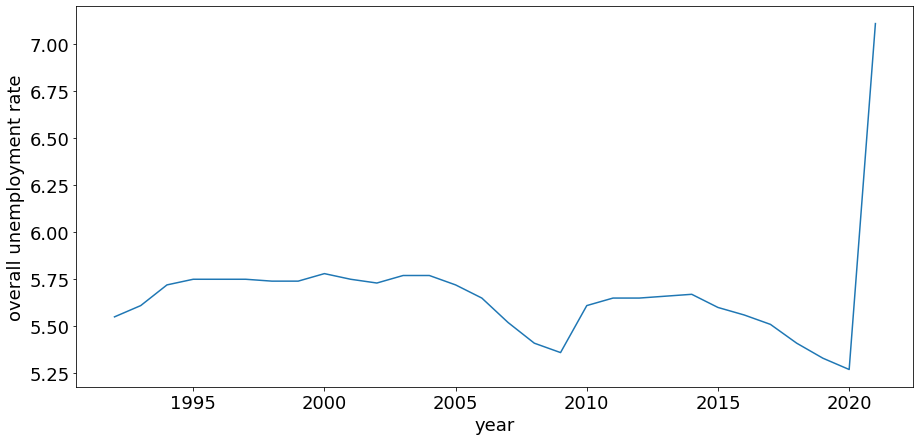

In [79]:
#using matplotlib to plot our 5th dataFrame
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.rcParams.update({'font.size': 18})
plt.plot(our_data5['year'],our_data5["rate"])
plt.xlabel("year")
plt.ylabel("overall unemployment rate")
plt.show()

#### Double bar graph representing unemployment rates in urban and rural India - extracted form our_data4, which shows that it spiked in 2020 because of covid-19

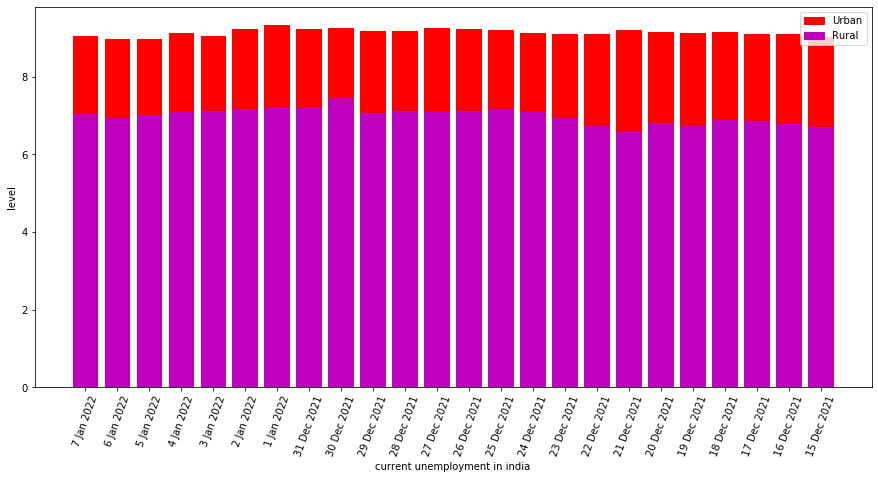

In [80]:
#using matplotlib to plot our 5th dataFrame
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.rcParams.update({'font.size': 10})
plt.bar(our_data4['date'],our_data4['Urban'],color='r')
plt.bar(our_data4['date'],our_data4['Rural'],color='m')
plt.xlabel("current unemployment in india")
plt.ylabel("level")
degrees = 70
plt.xticks(rotation=degrees)
cc3 = mpatches.Patch(color='r', label='Urban')
cc4 = mpatches.Patch(color='m', label='Rural')
plt.legend(handles=[cc3,cc4])
plt.show()

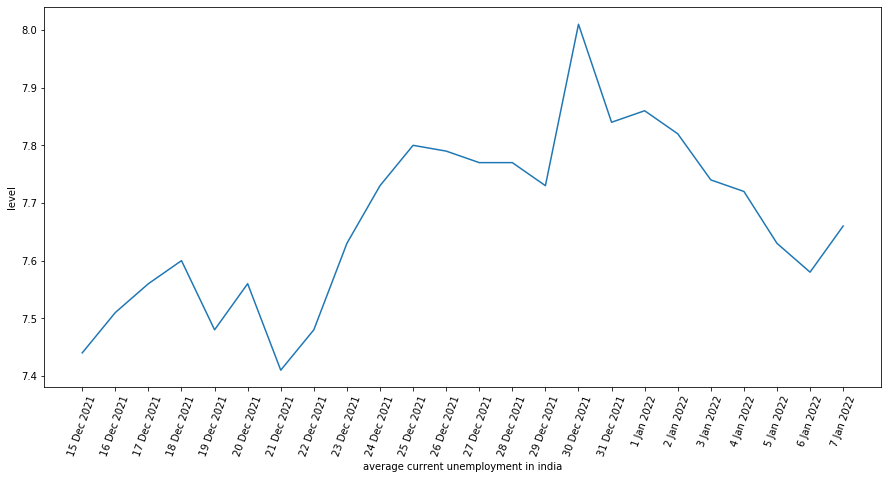

In [81]:
#using matplotlib to plot average unemployment rate 
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.plot(list(our_data4['date'])[::-1],list(our_data4['India'])[::-1])
plt.xlabel("average current unemployment in india")
plt.ylabel("level")
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

#### Here we can see through above line graph that unemployment rate is still increasing after december 2021 

In [82]:
#cleaning data for to plot bar graph of unemployment across the globe 
our_data1_multi_graph=our_data1.drop(['Month','Date','Primary_School','High_School','Associates_Degree','Professional_Degree','Men','Women'],axis=1).dropna()
our_data1_multi_graph=our_data1_multi_graph[118:123]

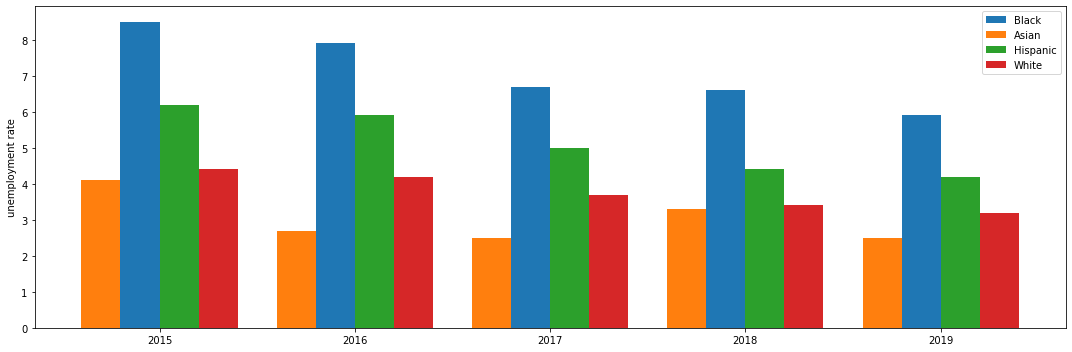

In [83]:
#plotting bra-grap from 2015 to 2019 
x = np.arange(len(list(our_data1_multi_graph['Year'])))
width = 0.2  

# creating subplot object to plot multiple graph
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - (width/4)-0.05, list(our_data1_multi_graph['Black']), width, label='Black')
rects2 = ax.bar(x - (width/2)-0.2, list(our_data1_multi_graph['Asian']), width, label='Asian')
rects3 = ax.bar(x + (width/4)+0.05, list(our_data1_multi_graph['Hispanic']), width, label='Hispanic')
rects4 = ax.bar(x + (width/2+0.2), list(our_data1_multi_graph['White']), width, label='White')

#putting lables and legend in our graph
ax.set_ylabel('unemployment rate')
ax.set_xticks(x, list(our_data1_multi_graph['Year']))
ax.legend()
plt.xticks([0,1,2,3,4], list(our_data1_multi_graph['Year']))
fig.tight_layout()
plt.show()

#### Corelation of drop out rates among men, women and the role it plays in unemlployment

C:\Users\rishy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rishy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


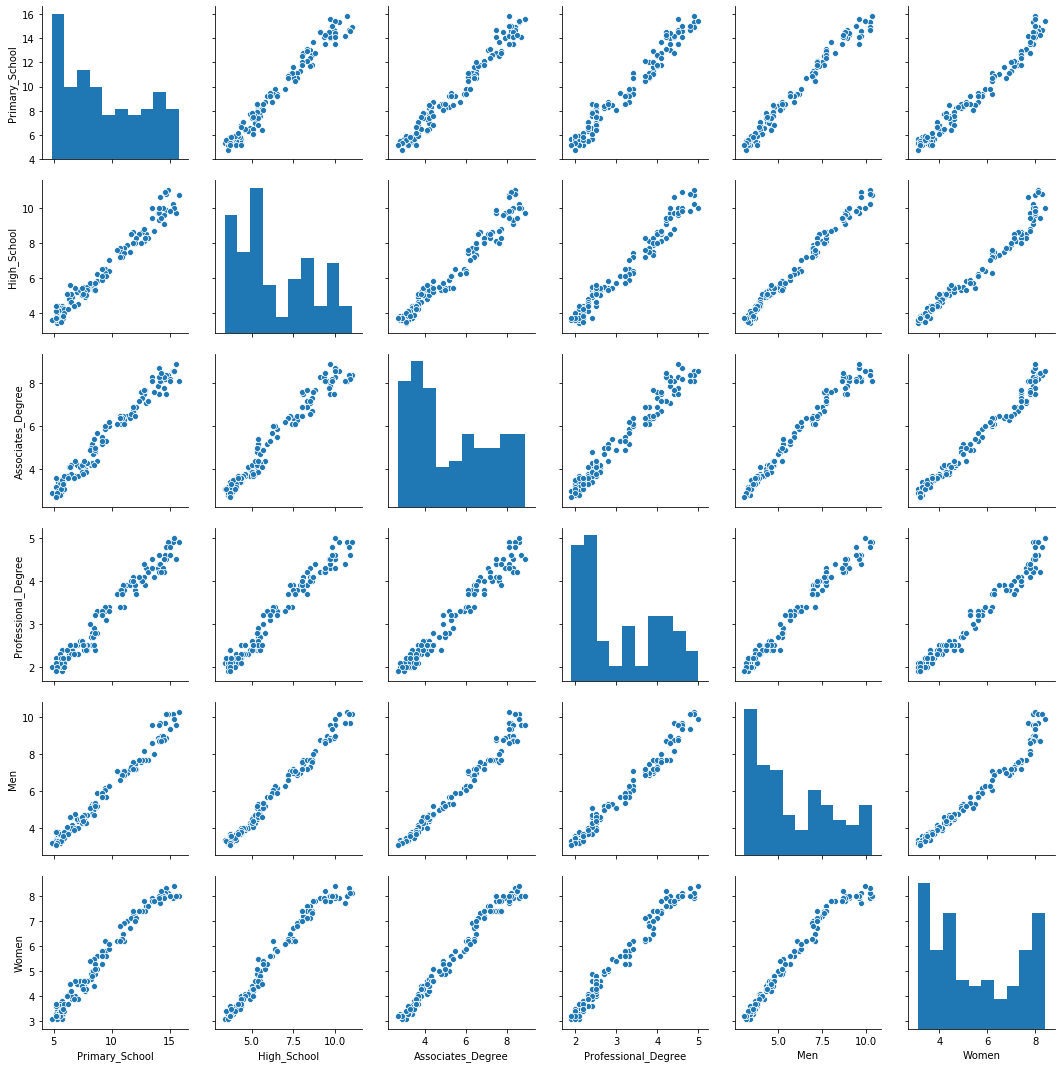

In [84]:
#using seaborn library to draw pair plot 
sns.pairplot(our_data1.drop(['Year','Month','Date','White','Black','Asian','Hispanic'],axis=1))
plt.show()

#### WORD CLOUD

In [85]:
# crating list of words
word_string1="rate unemployment job equilibrium steady state Depreciation capital aggregate supply effective worker bankruptcy bust crash crisis deflation dislocation downturn drop failure inactivity inflation overproduction panic paralysis recession retrenchment sag slide slowness slump stagflation stagnation bad times bear market big trouble hard times bad times bankruptcy bear market big trouble bust crashcrisis deflation dislocation downturn drop failure hard times inactivity inflation overproduction panic paralysis rainy days recession retrenchment sag slide slowness slump stagflation stagnation recession inflation international labour organization homelessness employment underemployment reserve army of labour european union frictional unemployment poverty welfare nairu productivity full employment structural unemployment natural rate of unemployment great depression job percentage deindustrialization unemployment rate labor force economy incomes keynesian wages minimum wage gdp mcjobs deficits labor economic economists eurozone debt jobs premiums enrollment stagnation payrolls disability eurostat foreclosure electrification person shock globalization state ageing jobless proletariat market-clearing rate exogeny rates rise rising decline spending declining deficit risen increase unemployment compensation slowing slowdown growth wage"
word_string=word_string1.split()

In [86]:
#performing tokenisation on our words
myWords=[]
for row in word_string:
    myWords = myWords + nltk.word_tokenize(row)
    
# extracing those words which have frequency greater than 2
data_analysis = nltk.FreqDist(myWords)  
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 2])

#creaing object of our word cloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations = False)
wcloud = wordcloud.generate_from_frequencies(filter_words)

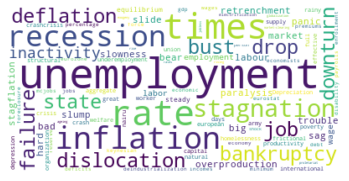

In [87]:
#plotting our word cloud
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-1.5, 200, 100, -2.5)
plt.show()

#### Through this word repetition frequency graph we can motice that words like unemployment, rate, times, inflation etc have the highest frequency.

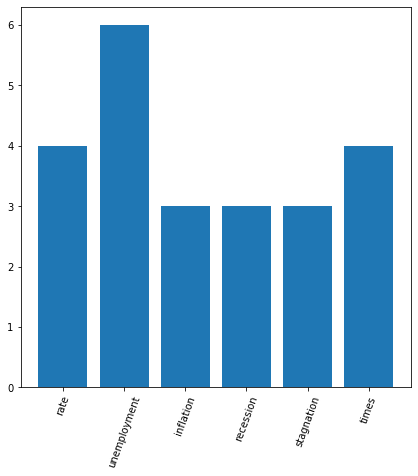

In [88]:
#plotting the graph showing those words which repeats the most
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
keys = {key:val for key, val in filter_words.items() if val >2}.keys()
values = {key:val for key, val in filter_words.items() if val >2}.values()
plt.bar(keys, values)
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

In [89]:
#building data for Sentiment analysis
t1="""Asset Turnover Ratio
Bailout
Balance Of Payment
Bank Rate
Base Rate
Brexit"""
t2="""Broad Money To Reserve Money
Call Money Rate
Capacity Cost
Capital Account
Capital Adequacy Ratio
Capital Market
Casa
Catch Up Effect"""
t3="""Ceteris Paribus
Clearing Price
Consumer Price Index
Consumer Surplus
Contagion
Contractionary Policy
Core Inflation
Cost Benefit Analysis
Cost Push Inflation"""
t4="""Countervailing Duties
Credit Default Swaps
Cross Elasticity Of Demand
Crowding Out Effect
Currency Deposit Ratio
Deadweight Loss
Debt Equity Ratio
Deflation
Depreciation
Depression"""
t5="""Dividend Signaling
Domestic Institutional Investor
Due Date Rate
Ease Of Doing Business
Emi
Etf
Exchange Rate
Fair Trade Price"""
t6="""Fallout Risk
Gross Domestic Saving
Gross National Product
Human Development Index
Imperfect Competition
Indifference Curve
Inferior Goods
Infrastructure Investment Trust
Investment Banking
Invisible Hand"""

#cleaning our string for the model
t_pos1=t1.replace("\n", "").split()
t_pos2=t2.replace("\n", "").split()
t_pos3=t3.replace("\n", "").split()
t_pos4=t4.replace("\n", "").split()
t_pos5=t5.replace("\n", "").split()
t_pos6=t6.replace("\n", "").split()

#### nltk functionality - To clean words to required specification

In [90]:
#writing lemmatizer function 
def lemmatizer_function(our_list):
    main_list=[]
    lemmatizer = WordNetLemmatizer()
    for i in our_list:
            main_list.append(lemmatizer.lemmatize(i, pos='n'))
    return main_list

#performing lemmatisation on our word list
word_string=lemmatizer_function(word_string)
t_pos1=lemmatizer_function(t_pos1)
t_pos2=lemmatizer_function(t_pos2)
t_pos3=lemmatizer_function(t_pos3)
t_pos4=lemmatizer_function(t_pos4)
t_pos5=lemmatizer_function(t_pos5)
t_pos6=lemmatizer_function(t_pos6)

In [91]:
#marking data whether positive or negative
pos_docs=[(t_pos1,'pos'),(t_pos2,'pos'),(t_pos3,'pos'),(t_pos4,'pos'),(t_pos5,'pos'),(t_pos6,'pos')]
neg_docs=[(word_string[0:40],'neg'),(word_string[40:60],'neg'),(word_string[60:70],'neg'),
          (word_string[70:90],'neg'),(word_string[90:138],'neg'),(word_string[138:158],'neg')]

In [92]:
# Create a training and test set 
train_pos_docs = pos_docs[0:4]
test_pos_docs = pos_docs[4:6]
train_neg_docs = neg_docs[0:4]
test_neg_docs = neg_docs[4:6]

# Merge the training sets and the test sets
training_docs = train_pos_docs+train_neg_docs
testing_docs = test_pos_docs+test_neg_docs

In [93]:
# building object of Sentiment Analyzer
sentim_analyzer = SentimentAnalyzer()

In [94]:
# Mark up the negative sections of the doc 
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

In [95]:
# Return all words that occur at least 2 times
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=2)

#printing number words which have minimum frequency of 2.
print(len(unigram_feats))

3


In [96]:
#adding feature extractor to our model
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

In [97]:
# Apply the feature extractor to the docs
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

In [98]:
# using NaiveBayesClassifier modeling to train on our data
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

Training classifier


In [99]:
# Print out the evaluation metrics
sentim_analyzer.evaluate(test_set)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.5,
 'Precision [neg]': None,
 'Recall [neg]': 0.0,
 'F-measure [neg]': None,
 'Precision [pos]': 0.5,
 'Recall [pos]': 1.0,
 'F-measure [pos]': 0.6666666666666666}

#### Here we can notice the accuracy of our model is just 50% because we didn't gave much data to train our model

In [100]:
# Print out most informative features
classifier.show_most_informative_features(15)

Most Informative Features
     contains(inflation) = False             pos : neg    =      3.0 : 1.0
     contains(recession) = False             pos : neg    =      3.0 : 1.0
          contains(time) = False             pos : neg    =      1.8 : 1.0


In [101]:
#making prediction through our model 
for doc in test_set:
    print(classifier.classify(doc[0]))

pos
pos
pos
pos


#### Unemployment range depicted through a boxplot

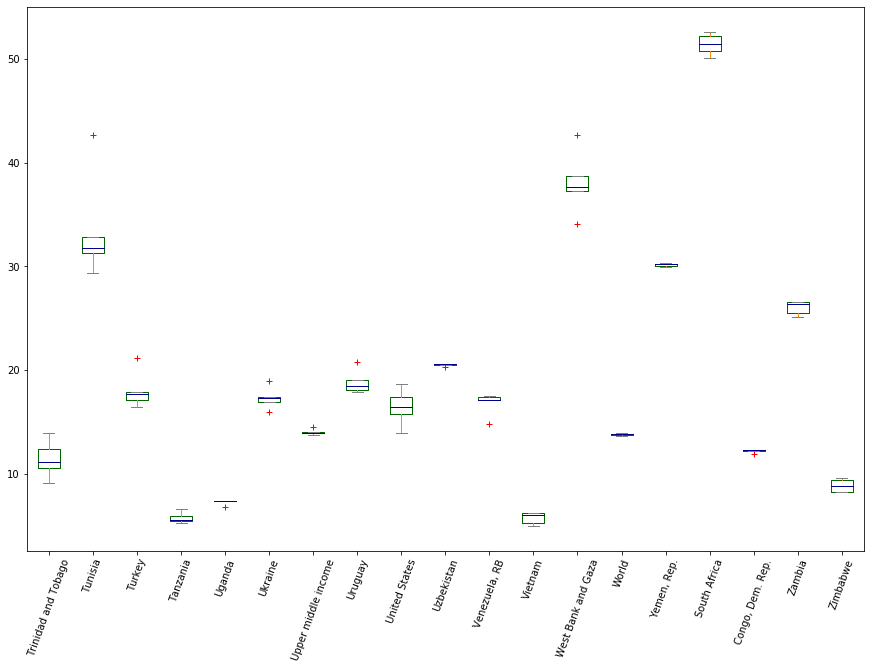

In [102]:
#setting color scheme
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

#plotting unemployment data of last few countries from our 2nd dataFrame
aseq=[i for i in our_data2.columns[0:200]]
our_data2_plt=our_data2.drop(aseq,axis=1)
our_data2_plt.plot.box(color=color, sym="r+",figsize=(15, 10))
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

#### Unemployment range depicted through a line graph

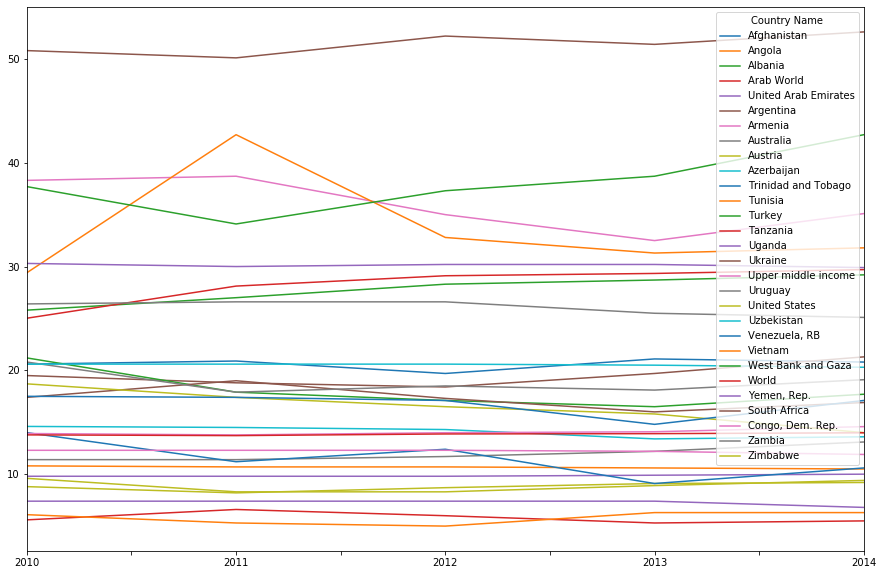

In [103]:
#plotting line graph of first few countries from our 2nd dataFrame
aseq=[i for i in our_data2.columns[10:200]]
our_data2_plt=our_data2.drop(aseq,axis=1)
our_data2_plt.plot(figsize=(15, 10))
plt.show()

#### mathematical description of dataset obtained though df our_data3

In [104]:
# describing statistics parameters (like mean, mode, median etc.) of our 3rd dataFtrame
our_data3.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


#### Heatmap of df our_data3 and we can see there is no relation between the columns 

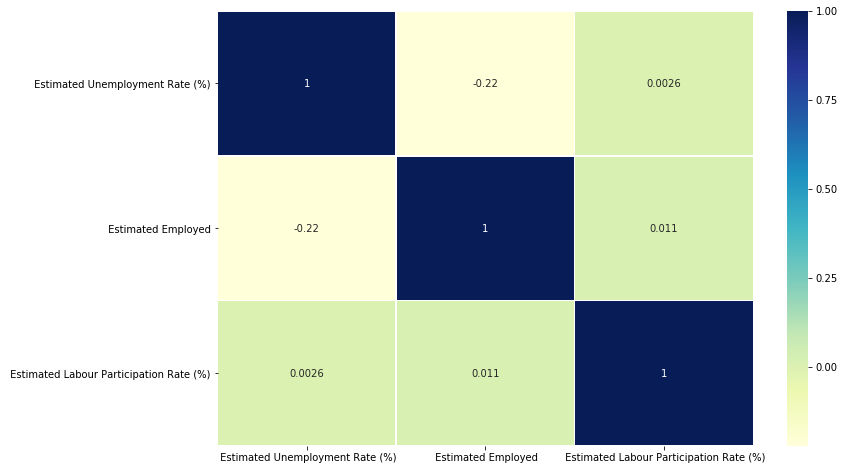

In [105]:
#using seaborn library to plot heat map
%matplotlib inline
plt.figure(figsize = (12,8))
ax = sns.heatmap(our_data3.corr(), cmap ="YlGnBu", linewidths = 0.30, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
degrees = 0
plt.yticks(rotation=degrees)
plt.show()

#### Dropout rates among Men and Women depicted through a diagonal graph

In [106]:
#deviding our data to test and train our model  
x=our_data1.drop(['Year','Month','Date','White','Black','Asian','Hispanic','Men','Women'],axis=1).dropna()
y=our_data1.drop(['Year','Month','Primary_School','Date','High_School','Associates_Degree',
                'Professional_Degree','White','Black','Asian','Hispanic'],axis=1).dropna()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [107]:
#building pipeline which first scale our data then perform liner regression on it
pipe = Pipeline([('scaler', StandardScaler()), ('linearregression', LinearRegression())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)

In [108]:
#Model score, mean squared error & root mean squared error
print('Model score = ',pipe.score(x_test, y_test))
print('mean_sqrd_error is = ',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is = ',np.sqrt(mean_squared_error(y_test,y_pred)))

Model score =  0.9860170750978912
mean_sqrd_error is =  0.05493325183863035
root_mean_squared error of is =  0.23437843723054036


C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


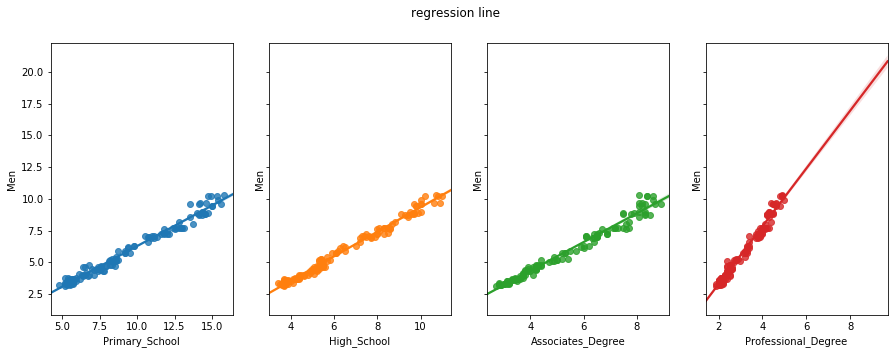

In [109]:
#plotting regression line with respect to men unemployment rate
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('regression line')
sns.regplot(y=y['Men'], x=x['Primary_School']  ,ax=axes[0])
sns.regplot(y=y['Men'], x=x['High_School']    ,ax=axes[1])
sns.regplot(y=y['Men'], x=x['Associates_Degree'],ax=axes[2])
sns.regplot(y=y['Men'], x=x['Professional_Degree'],ax=axes[3])
plt.show()

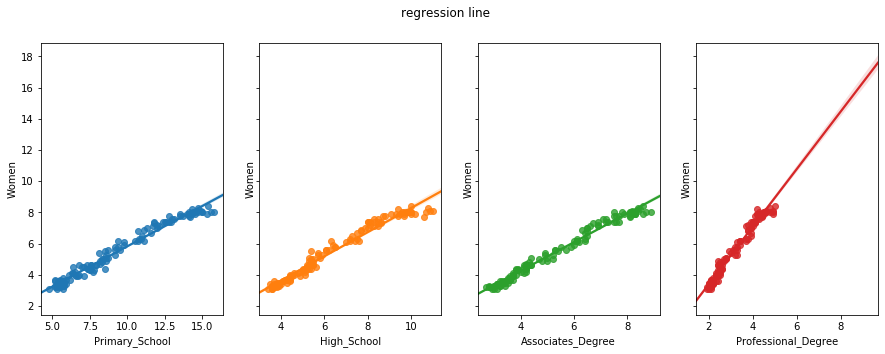

In [110]:
#plotting regression line with respect to women unemployment rate
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('regression line')
sns.regplot(y=y['Women'], x=x['Primary_School']  ,ax=axes[0])
sns.regplot(y=y['Women'], x=x['High_School']    ,ax=axes[1])
sns.regplot(y=y['Women'], x=x['Associates_Degree'],ax=axes[2])
sns.regplot(y=y['Women'], x=x['Professional_Degree'],ax=axes[3])
plt.show()

### CONCLUSION

### We have extracted data from multiple websites to compare and understand the effects of education on unemployment numbers around the world. It was clear through our dataset that unemployment in developed countries was much less as compared to unemployement in underdeveloped countries. This theory was also confirmed through the double bar graphs that we plotted for urban and rural India unemployment. A similar trend was seen here, with urban unemployment numbers being lower than that in rural India. We were also able to identify a corelation between dropout rates and unemployment in men and women through sklearn library. There was a clear corelation between the education dropout rates and unemployment. This stayed true without significant differece for both genders. From our data it is clear that education/skills plays an important role in decreasing unemployment.

### Here I took help from documentation of these major libraries:
#### 1. pandas fro building data frames https://pandas.pydata.org/docs/getting_started/overview.html
#### 2. numpy to perform maths operations https://numpy.org/doc/
#### 3. matplotlib to plot graphs from our databases https://matplotlib.org/stable/users/index.html
#### 4. seaborn to plot heat map and pair plot graph https://seaborn.pydata.org/generated/seaborn.heatmap.html
#### 5. beautifulsoup to perform web scraping https://beautiful-soup-4.readthedocs.io/en/latest/
#### 6. wordcloud to draw unemployment word cloud https://amueller.github.io/word_cloud/
#### 7. sklearn to build regression model https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#### 8. nltk to perform sentiment analysis https://www.nltk.org/api/nltk.sentiment.html

#### If formating is not proper then please check out pdf version of it.